# Análise de variáveis: Kaggle Titanic

Esse notebook tem como objetivo reunir códigos úteis para exploração e modificação de variáveis em um dataset, utilizando o dataset de treino da competição Kaggle do Titanic como exemplo.

## Sumário:
1. [Importação de pacotes](#importa_pacotes) <br>
2. [Funções auxiliares](#funcoes) <br>
3. [Descrição do dataset](#descricao_dataset) <br>

## 1. Importação de pacotes

In [38]:
import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import plotly.express as px
import plotly.graph_objects as go

# Exibe todas as colunas do dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Propriedades gerais para gráficos
plt.style.use('ggplot')
params = {'legend.fontsize': 'large',
#           'figure.figsize': (6, 6),  #squared figure!!
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

%matplotlib inline

## 2. Funções auxiliares

In [2]:
def percent_zero(df):
    """
    calculate the percentage of zero values in a dataframe
    """
    pz = ((df == 0).sum()/len(df)).sort_values(ascending = False)
    
    return pz

In [3]:
def plot_var_target(df, feature, target):
    """
    plot categorical variable vs. categorical target
    """
    return sns.countplot(x=feature, hue=target, data=df, pallete='bright')

## 3. Importa dataset

In [4]:
# dataframe que será usado para modificações
dataset = pd.read_csv('train.csv')

In [5]:
# para comparações futuras com o dataset original, importar os dados novamente em outra variável
df_original = pd.read_csv('train.csv')

## 4. Descrição do dataset

In [29]:
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.1 Qual o tamanho do dataset?

In [30]:
df_original.shape

(891, 12)

### 4.2 Qual o tipo das variáveis? Os tipos estão adequados?

In [31]:
df_original.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Verificação de missings

In [32]:
# comando clássico do pandas para verificação de missings:
# dataset.isnull().sum()

# utilização da biblioteca sidetable para uma tabela mais bonitinha
df_original.stb.missing()

,missing,total,percent
Cabin,687,891,77.104377
Age,177,891,19.865320
Embarked,2,891,0.224467
PassengerId,0,891,0.000000
Survived,0,891,0.000000
Pclass,0,891,0.000000
Name,0,891,0.000000
Sex,0,891,0.000000
SibSp,0,891,0.000000
Parch,0,891,0.000000


In [54]:
# análise da frequencia usando o sidetable
# bom para verificação da distribuição da variável target

df_original.stb.freq(["Survived"])

,Survived,count,percent,cumulative_count,cumulative_percent
0,0,549,61.616162,549,61.616162
1,1,342,38.383838,891,100.000000


## 5. Análise exploratória do dataset original

### Existe inconsistência nos dados?

In [42]:
# verifica idade negativa
df_original.loc[df_original['Age']<=0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [44]:
# verifica duplicidade de uma linha completa

df_original[df_original.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# para verificar duplicidade em apenas uma coluna
# df_original[df_original.duplicated(keep=False, subset='nome_da_coluna')]

# para remover duplicidade:
# df_original.drop_duplicates(ignore_index=True, inplace=True)

### Comparando diferentes formatos de histogramas

You may derive the bins using the following formulas:

n = number of observations <br>
Range = maximum value – minimum value <br>
number of intervals =  √n <br>
Width of intervals =  Range / (# of intervals) <br>

These formulas can then be used to create the frequency table followed by the histogram.

Text(0.5, 0, 'Age')

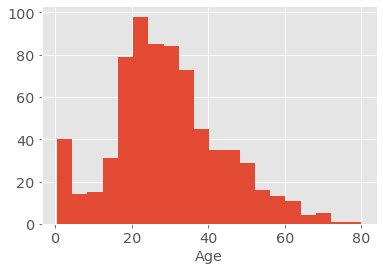

In [47]:
# histograma do matplotlib

plt.hist(df_original['Age'].values,bins=20)
plt.xlabel('Age')

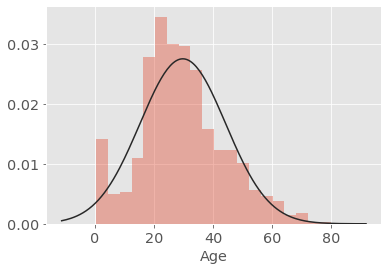

In [40]:
# histograma do seaborn com fitting de função escolhida incluido (no caso, quis comparar os dados com a distribuição normal)

sns.distplot(df_original['Age'], kde=False, fit=stats.norm)

Vários histogramas em uma mesma figura

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,tight_layout=True,figsize=(12,5))

ax1.hist(df_data['Age'].values,bins=20,label='Inputed (Median)')
ax1.hist(df_data_original['Age'].values,bins=20,label='Original')
# ax1.set_title()
ax1.set_xlabel('Age')
ax1.set_xlim(-1,81)
ax1.legend()

ax2.hist(df_data_original.loc[df_data_original['Survived']==1]['Age'].values, bins=20,label='Survived')
ax2.set_title('Original data')
ax2.set_xlabel('Age')
ax2.set_xlim(-1,81)
ax2.legend()

ax3.hist(df_data_original.loc[df_data_original['Survived']==0]['Age'].values,bins=20,label='Not Survived')
ax3.set_title('Original data')
ax3.set_xlabel('Age')
ax3.set_xlim(-1,81)
ax3.legend()

Descritivo de uma coluna específica do dataset (nesse caso, a coluna 'Age')

In [33]:
df_original['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
# qual a mediana da idade? Forma direta para obter:
age_median = df_original["Age"].median()
age_median

28.0

In [48]:
# quem são os passageiros com informação faltante na coluna "Embarked"?

embarked_nan = df_original[df_original["Embarked"].isnull()]
embarked_nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Correlação entre as variáveis

In [37]:
# essa função ignora dados categóricos. Importante transformar todas as colunas em numéricos para uma análise completa

corr = df_original.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


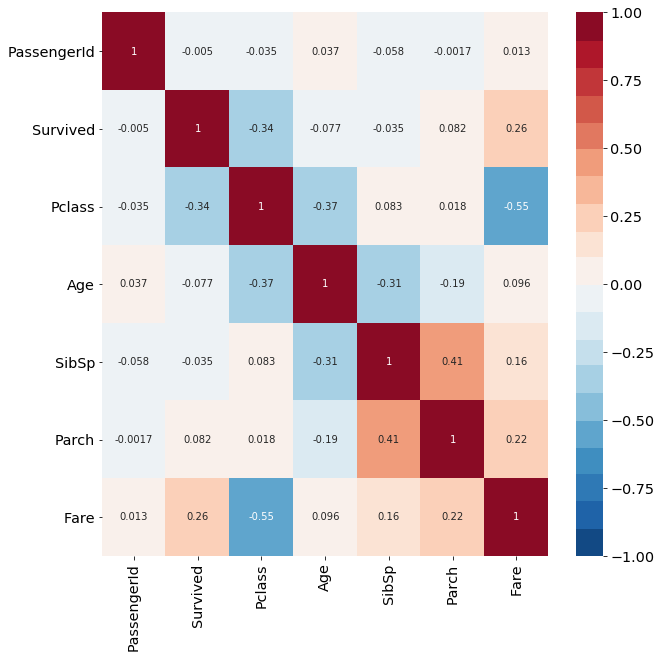

In [36]:
# correlation in a figure

fig,ax = plt.subplots(1,1,figsize=(10,10))

ax = sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap=sns.color_palette("RdBu_r", 20),center=0)#,xticklabels=corr.columns,yticklabels=corr.columns)

## 6. Imputação de valores

### Descrição da estratégia de imputação adotada

Nesse dataset em particular, existem valores faltantes em três colunas: "Embarked", "Age" e "Cabin".

A informação "Cabin" não parece relevante para prever a sobrevivência, além de estar muito incompleta, sendo composta em 77% por dados faltantes. Irei ignorar e retirar a coluna do dataset.

Decidi substituir os faltantes em 'Embarked' pela porta com maior fração de embarque por passageiros da 1a classe (seria a porta mais elitista, digamos assim). Porém a porta mais comum de embarque de todos os passageiros, independente da classe, é a S. Irei verificar no futuro se essa definição altera os resultados de machine learning.

Para a substituição de missings da coluna "Age", optei pela mediana.

In [16]:
# substituição dos missings em 'Embarked' pela porta com maior fração de embarque por passageiros da 1a classe
dataset.loc[dataset['Embarked'].isnull(),'Embarked']='C'

In [17]:
# substituição dos missings da idade pela mediana:
dataset.loc[dataset['Age'].isnull(),'Age'] = age_median

In [27]:
# remoção da coluna 'Cabin'
dataset = dataset.drop('Cabin', axis=1)

In [28]:
# verificação do resultado final:
dataset.stb.missing()

,missing,total,percent
PassengerId,0,891,0.0
Survived,0,891,0.0
Pclass,0,891,0.0
Name,0,891,0.0
Sex,0,891,0.0
Age,0,891,0.0
SibSp,0,891,0.0
Parch,0,891,0.0
Ticket,0,891,0.0
Fare,0,891,0.0


## 7. Análise exploratória do resultado da imputação